<a href="https://colab.research.google.com/github/Tharaka43/Cal--2/blob/main/Grup126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File Path
file_path = "/content/drive/MyDrive/Group_126/data/raw/heart.csv"

# Load Dataset
df = pd.read_csv(file_path)

# Show first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Typical angina,125,212,Normal,1,168,No,1.0,Upsloping,2,Normal,0
1,53,Male,Typical angina,140,203,High,0,155,Yes,3.1,Downsloping,0,Normal,0
2,70,Male,Typical angina,145,174,Normal,1,125,Yes,2.6,Downsloping,0,Normal,0
3,61,Male,Typical angina,148,203,Normal,1,161,No,0.0,Upsloping,1,Normal,0
4,62,Female,Typical angina,138,294,High,1,106,No,1.9,Flat,3,Fixed Defect,0


In [ ]:
# Basic Info
df.info()

# Check Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Check Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 112.2+ KB

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
targe

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,trestbps,chol,restecg,thalach,oldpeak,ca,target,sex_Male,cp_Atypical angina,cp_Non-anginal pain,cp_Typical angina,fbs_Normal,exang_Yes,slope_Flat,slope_Upsloping,thal_Normal,thal_Reversible Defect
0,52,125,212,1,168,1.0,2,0,True,False,False,True,True,False,False,True,True,False
1,53,140,203,0,155,3.1,0,0,True,False,False,True,False,True,False,False,True,False
2,70,145,174,1,125,2.6,0,0,True,False,False,True,True,True,False,False,True,False
3,61,148,203,1,161,0.0,1,0,True,False,False,True,True,False,False,True,True,False
4,62,138,294,1,106,1.9,3,0,False,False,False,True,False,False,True,False,False,False


In [ ]:
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,age,trestbps,chol,restecg,thalach,oldpeak,ca,sex_Male,cp_Atypical angina,cp_Non-anginal pain,cp_Typical angina,fbs_Normal,exang_Yes,slope_Flat,slope_Upsloping,thal_Normal,thal_Reversible Defect
0,-0.153209,-0.103686,-0.658078,0.909367,0.794868,-0.044523,1.286286,0.68313,-0.440225,-0.632456,1.05337,0.419014,-0.693375,-0.92489,1.060254,1.226403,-0.249136
1,-0.125121,-0.092416,-0.832659,-0.995974,0.227146,1.766643,-0.709563,0.68313,-0.440225,-0.632456,1.05337,-2.386557,1.442221,-0.92489,-0.943170,1.226403,-0.249136
2,0.352381,-0.088660,-1.395196,0.909367,-1.082982,1.335413,-0.709563,0.68313,-0.440225,-0.632456,1.05337,0.419014,1.442221,-0.92489,-0.943170,1.226403,-0.249136
3,0.099586,-0.086406,-0.832659,0.909367,0.489171,-0.906983,0.288361,0.68313,-0.440225,-0.632456,1.05337,0.419014,-0.693375,-0.92489,1.060254,1.226403,-0.249136
4,0.127674,-0.093919,0.932545,0.909367,-1.912730,0.731691,2.284210,-1.46385,-0.440225,-0.632456,1.05337,-2.386557,-0.693375,1.08121,-0.943170,-0.815392,-0.249136


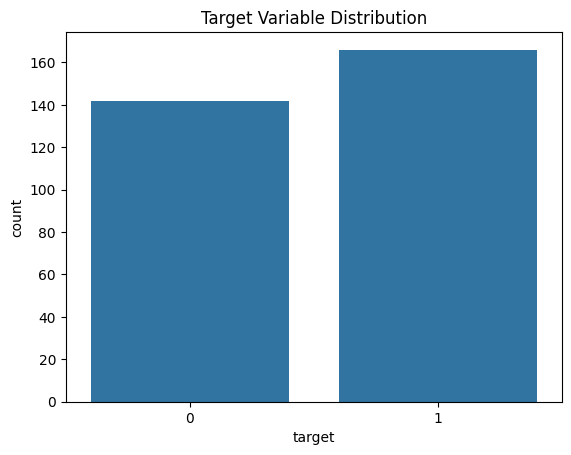

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Target Variable Distribution")
plt.show()


In [ ]:
df_encoded.describe()


,age,trestbps,chol,restecg,thalach,oldpeak,ca,target
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,57.454545,263.009740,245.925325,0.522727,149.798701,1.051623,0.711039,0.538961
std,35.659919,1333.205939,51.636013,0.525695,22.935792,1.161361,1.003710,0.499291
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.750000,120.000000,211.000000,0.000000,133.750000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,1.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.250000,1.000000,166.250000,1.600000,1.000000,1.000000
max,555.000000,15341.000000,564.000000,2.000000,202.000000,6.200000,4.000000,1.000000


In [ ]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


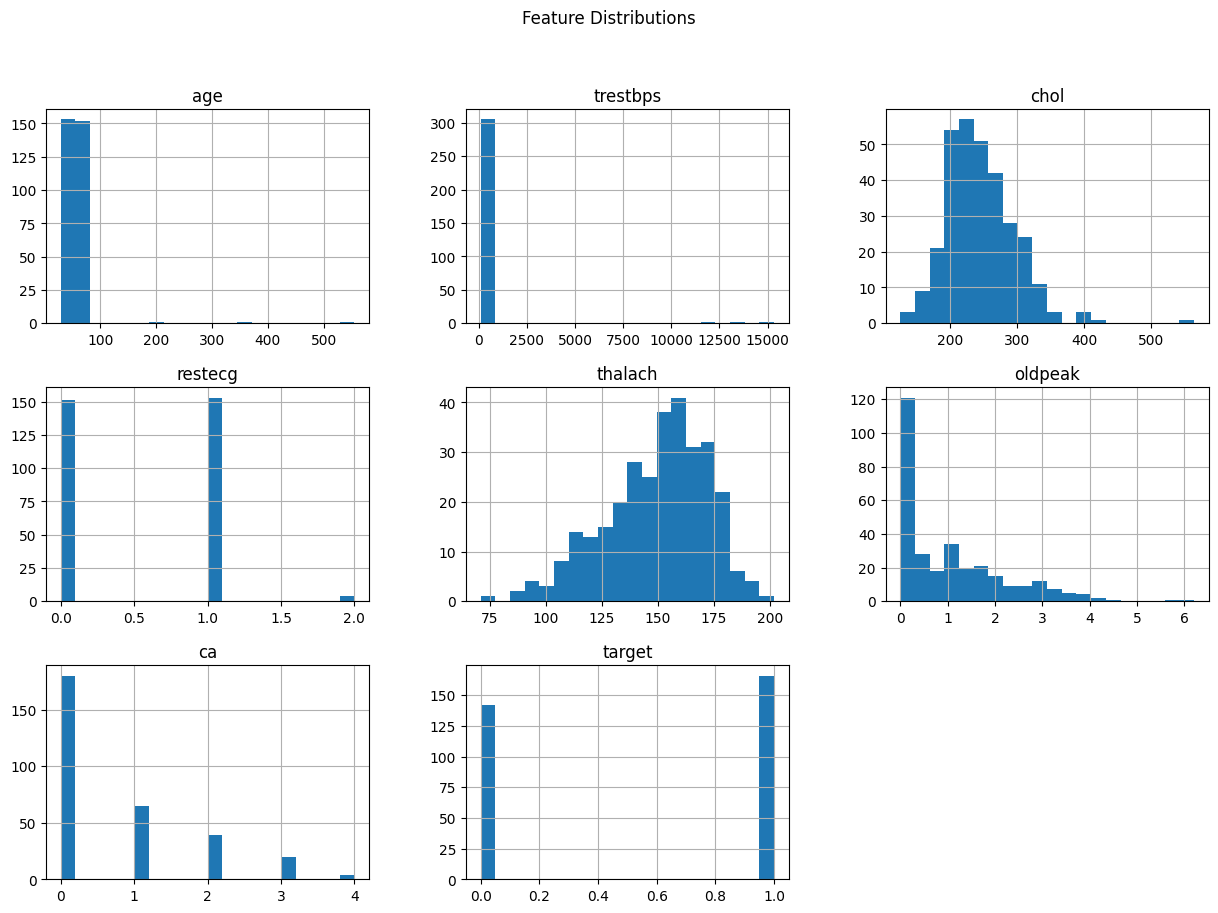

In [ ]:
df_encoded.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()


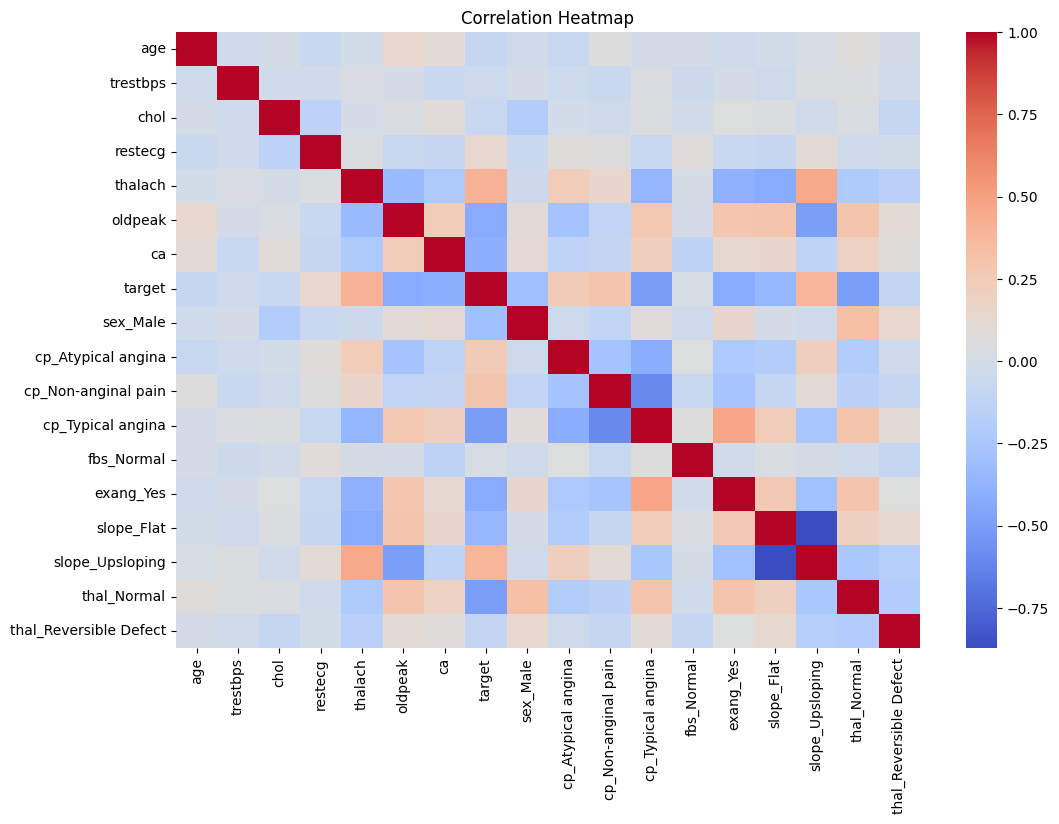

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


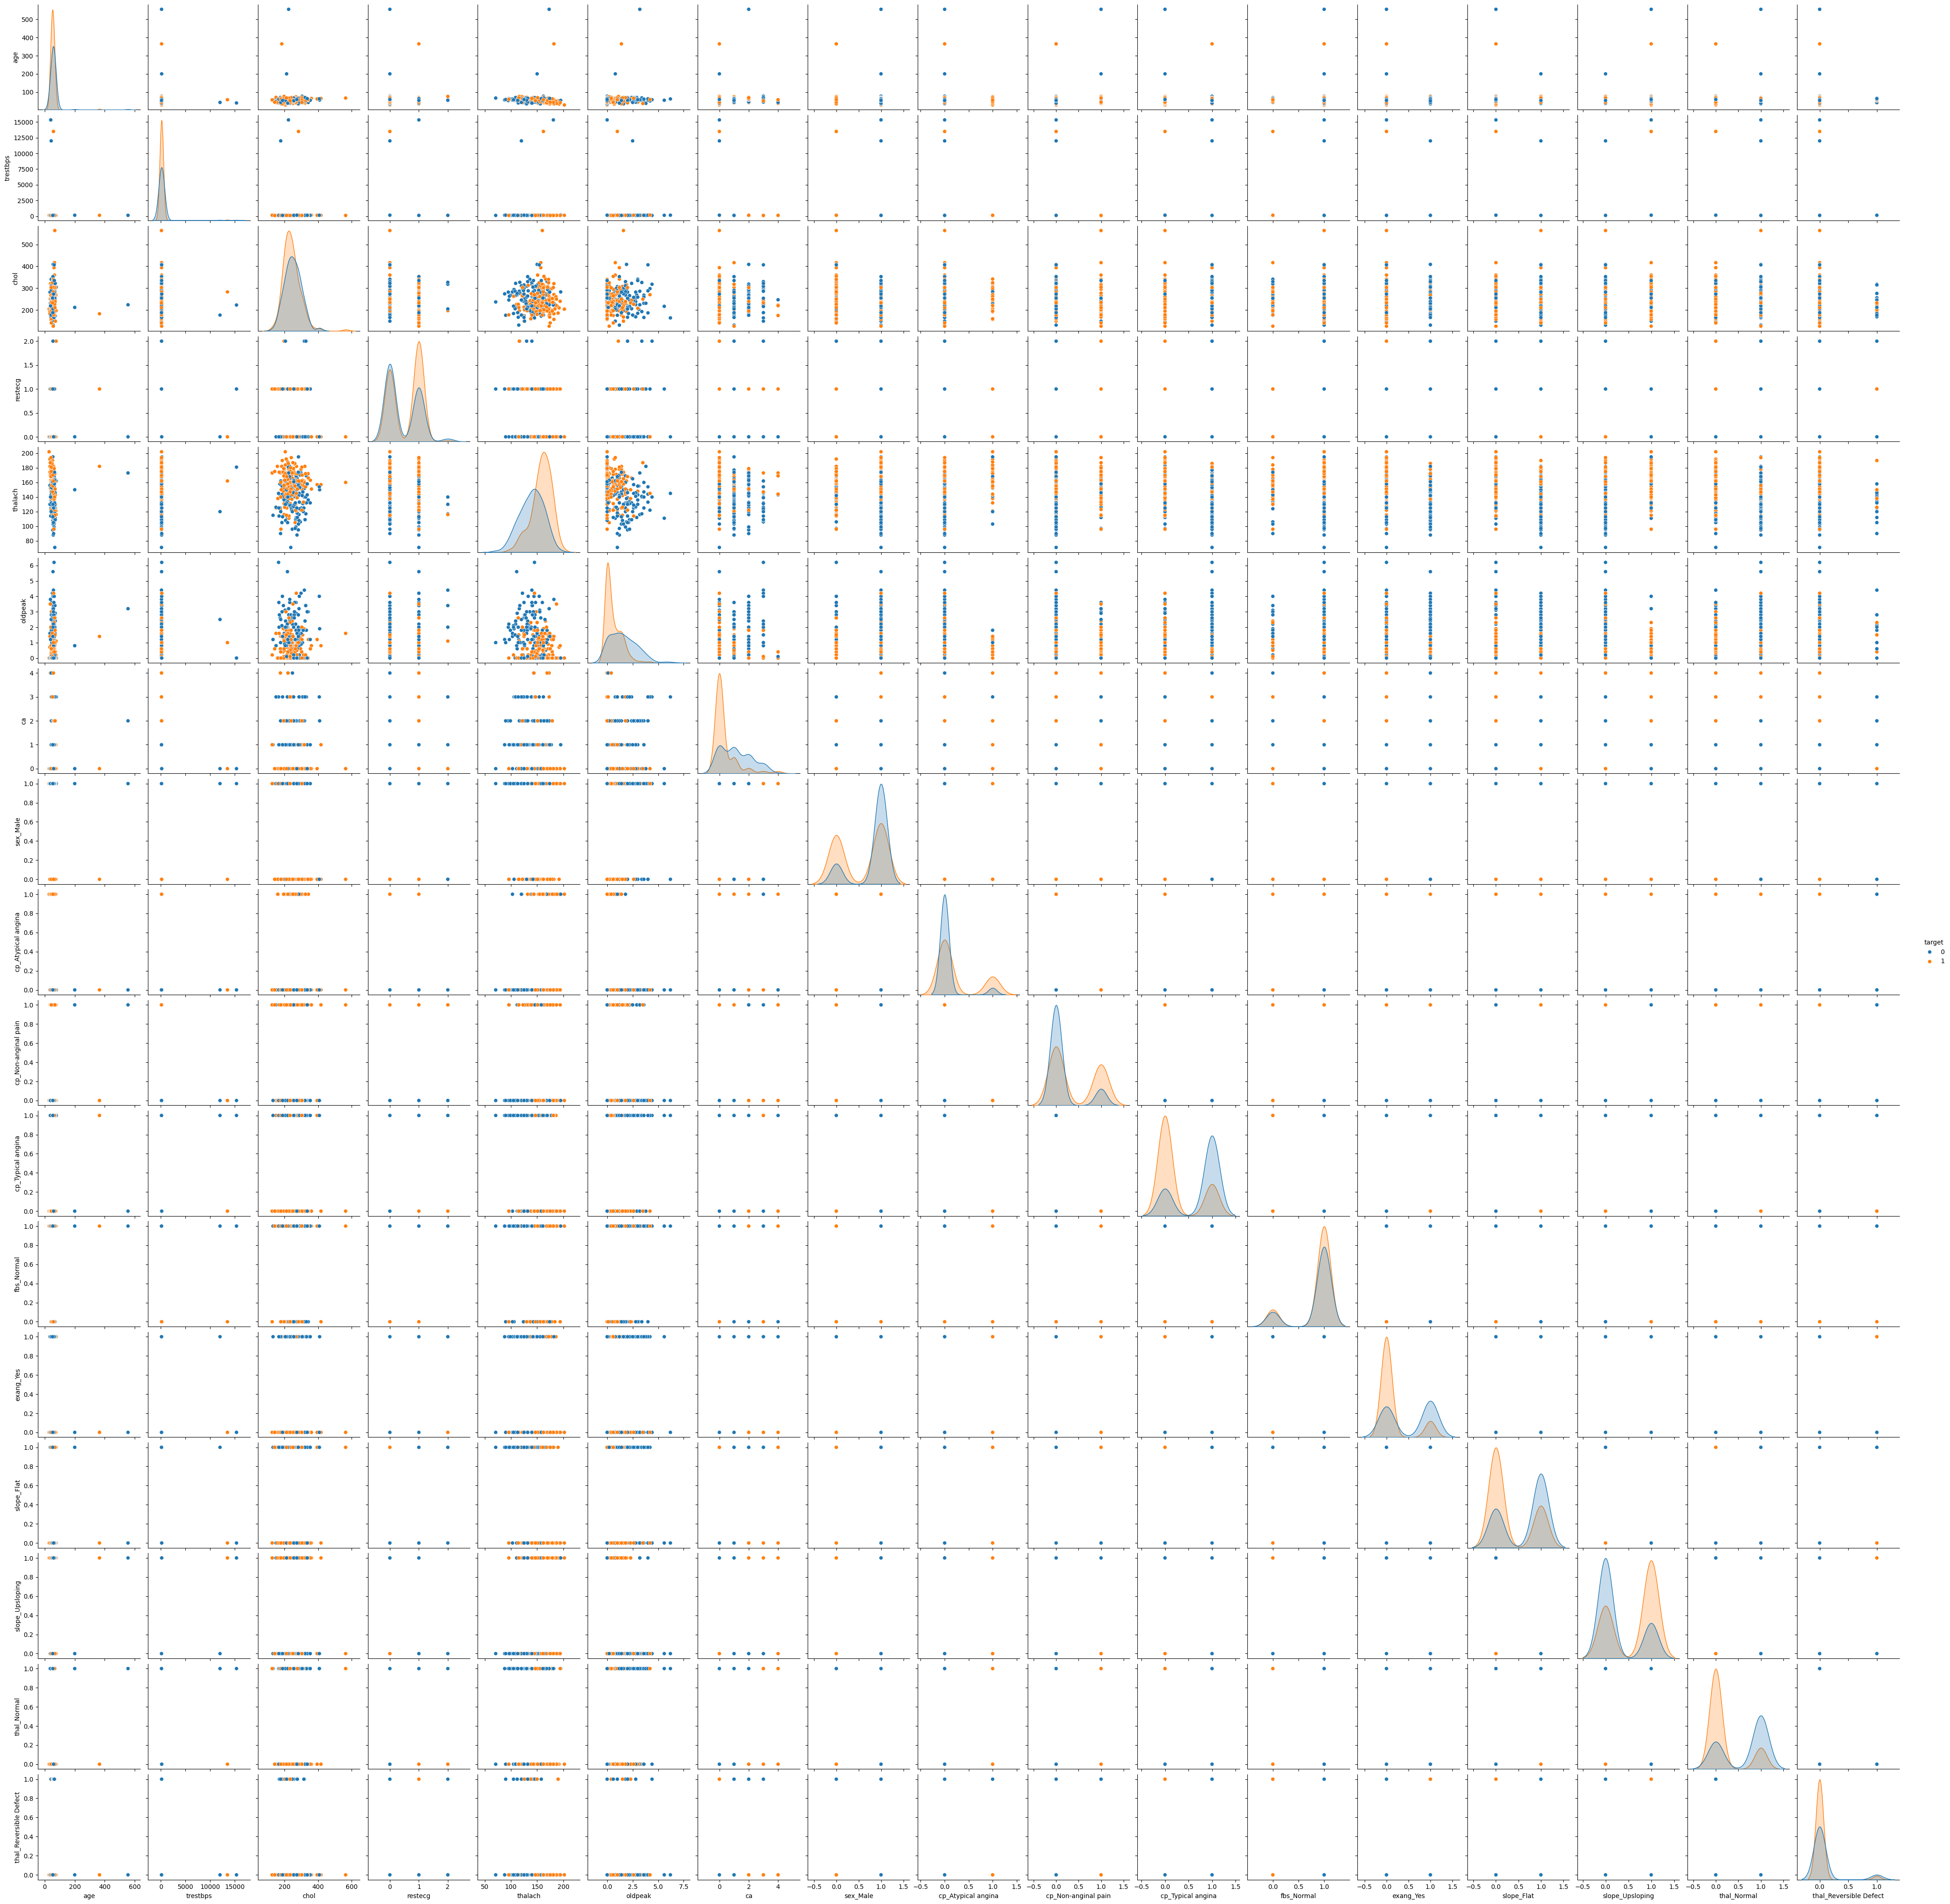

In [ ]:
sns.pairplot(df_encoded, hue="target", diag_kind="kde")
plt.show()


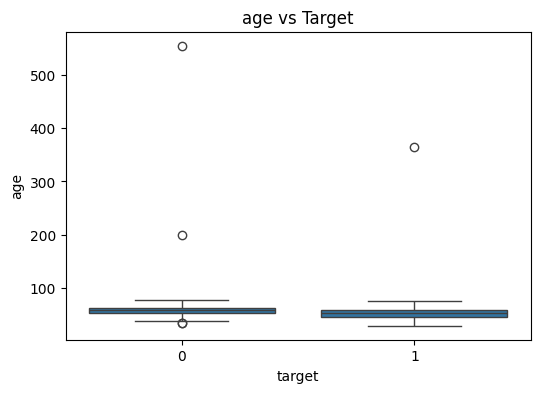

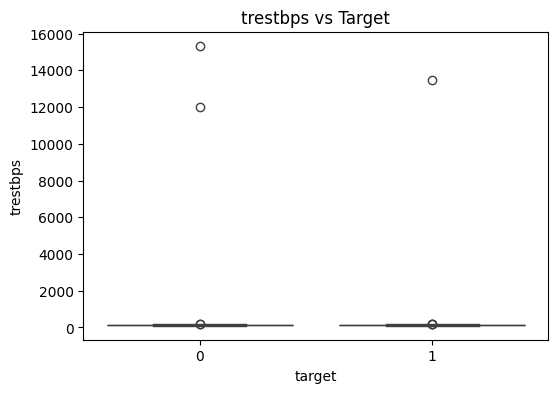

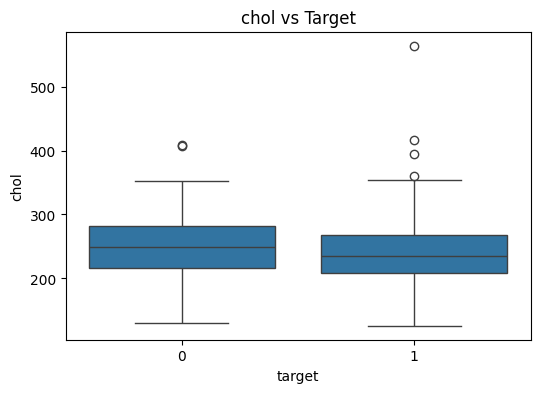

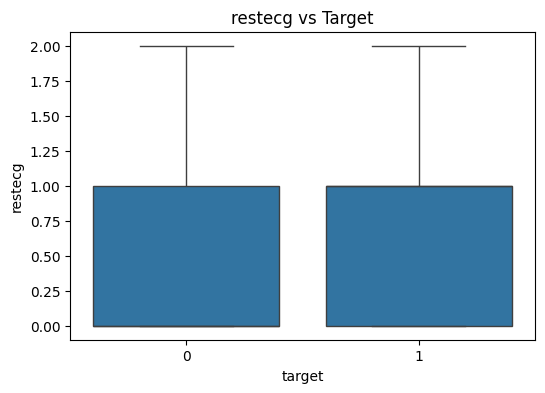

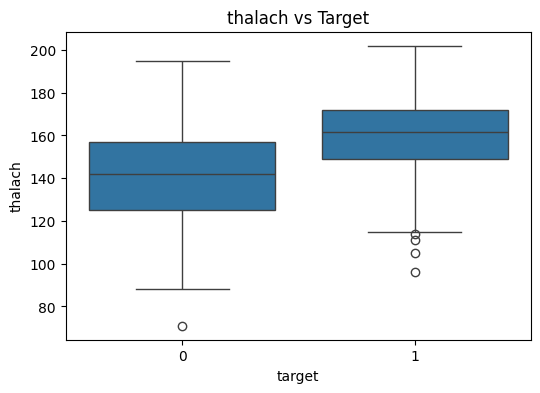

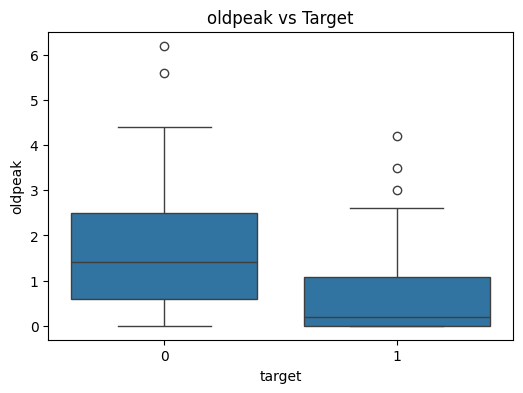

In [ ]:
for col in X.columns[:6]:  # first 6 columns for demo
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=X[col])
    plt.title(f"{col} vs Target")
    plt.show()


In [ ]:
import os

base_path = "/content/drive/MyDrive/Group_126"
folders = ["data/raw", "data/external", "notebooks", "results/eda_visualizations", "results/logs", "results/outputs"]

for folder in folders:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)


In [ ]:
!cp "/content/drive/MyDrive/Group_126/data/raw/heart.csv" "/content/drive/MyDrive/Group_126/data/raw/"


cp: '/content/drive/MyDrive/Group_126/data/raw/heart.csv' and '/content/drive/MyDrive/Group_126/data/raw/heart.csv' are the same file


In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/IT123456_Preprocessing1.ipynb" "/content/drive/MyDrive/Group_126/notebooks/"
!cp "/content/drive/MyDrive/Colab Notebooks/group_pipeline.ipynb" "/content/drive/MyDrive/Group_126/notebooks/"



cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/IT123456_Preprocessing1.ipynb': No such file or directory
cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/group_pipeline.ipynb': No such file or directory


In [ ]:
# Example: Save a plot
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'])
plt.title("Target Distribution")
plt.savefig("/content/drive/MyDrive/Group_126/results/eda_visualizations/target_distribution.png")
plt.close()


In [ ]:
df_encoded.to_csv("/content/drive/MyDrive/Group_126/results/outputs/processed_heart.csv", index=False)


In [ ]:
with open("/content/drive/MyDrive/Group_126/results/logs/run_log.txt", "w") as f:
    f.write("EDA & Preprocessing run successfully.\n")
